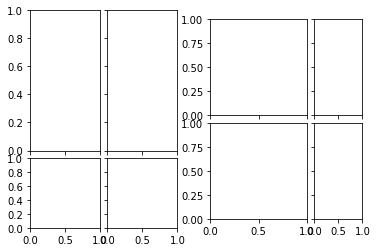

In [1]:
#Demo Imagegrid Aspect

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1)

grid1 = ImageGrid(fig, 121, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)

for i in [0, 1]:
    grid1[i].set_aspect(2)


grid2 = ImageGrid(fig, 122, (2, 2), axes_pad=0.1,
                  aspect=True, share_all=True)


for i in [1, 3]:
    grid2[i].set_aspect(2)

plt.show()

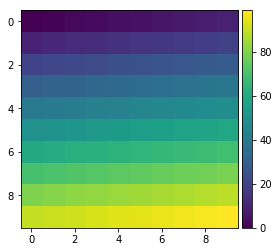

In [2]:
#Simple Colorbar

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot(111)
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()

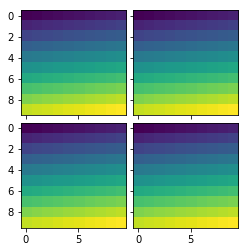

In [3]:
#Simple Axesgrid

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im = np.arange(100).reshape((10, 10))

fig = plt.figure(1, (4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(4):
    grid[i].imshow(im)  # The AxesGrid object work as a list of axes.

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


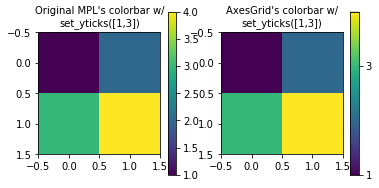

In [4]:
#Demo New Colorbar

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.colorbar import colorbar

plt.rcParams["text.usetex"] = False

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

im1 = ax1.imshow([[1, 2], [3, 4]])
cb1 = fig.colorbar(im1, ax=ax1)
cb1.ax.set_yticks([1, 3])
ax1.set_title("Original MPL's colorbar w/\nset_yticks([1,3])", size=10)

im2 = ax2.imshow([[1, 2], [3, 4]])
cb2 = colorbar(im2, ax=ax2)
cb2.ax.set_yticks([1, 3])
ax2.set_title("AxesGrid's colorbar w/\nset_yticks([1,3])", size=10)

plt.show()

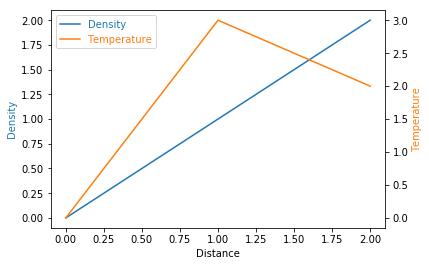

In [5]:
#Parasite Simple

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Distance")
host.set_ylabel("Density")
par.set_ylabel("Temperature")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par.plot([0, 1, 2], [0, 3, 2], label="Temperature")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()

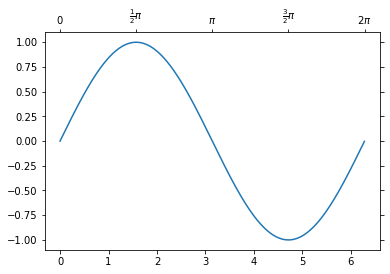

In [6]:
#Simple Axisline4

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import numpy as np

ax = host_subplot(111)
xx = np.arange(0, 2*np.pi, 0.01)
ax.plot(xx, np.sin(xx))

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax2.set_xticklabels(["$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

plt.draw()
plt.show()

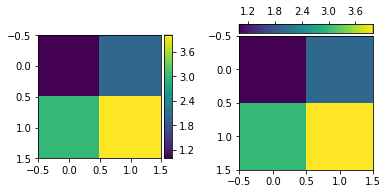

In [7]:
#Demo Colorbar with Axes Divider

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from mpl_toolkits.axes_grid1.colorbar import colorbar
# from matplotlib.pyplot import colorbar

fig = plt.figure(1, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)

ax1 = fig.add_subplot(121)
im1 = ax1.imshow([[1, 2], [3, 4]])

ax1_divider = make_axes_locatable(ax1)
cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
cb1 = colorbar(im1, cax=cax1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow([[1, 2], [3, 4]])

ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("top", size="7%", pad="2%")
cb2 = colorbar(im2, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")
plt.show()

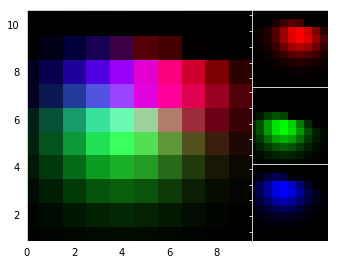

In [8]:
#Simple RGB

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_rgb import RGBAxes


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def get_rgb():
    Z, extent = get_demo_image()

    Z[Z < 0] = 0.
    Z = Z / Z.max()

    R = Z[:13, :13]
    G = Z[2:, 2:]
    B = Z[:13, 2:]

    return R, G, B


fig = plt.figure(1)
ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8])

r, g, b = get_rgb()
kwargs = dict(origin="lower", interpolation="nearest")
ax.imshow_rgb(r, g, b, **kwargs)

ax.RGB.set_xlim(0., 9.5)
ax.RGB.set_ylim(0.9, 10.6)

plt.show()

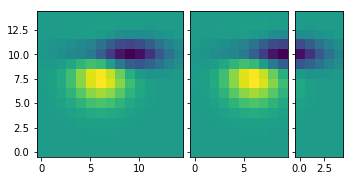

In [9]:
#Simple Axesgrid2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

F = plt.figure(1, (5.5, 3.5))
grid = ImageGrid(F, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,
                 add_all=True,
                 label_mode="L",
                 )

Z, extent = get_demo_image()  # demo image

im1 = Z
im2 = Z[:, :10]
im3 = Z[:, 10:]
vmin, vmax = Z.min(), Z.max()
for i, im in enumerate([im1, im2, im3]):
    ax = grid[i]
    ax.imshow(im, origin="lower", vmin=vmin,
              vmax=vmax, interpolation="nearest")

plt.draw()
plt.show()


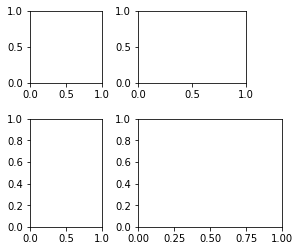

In [10]:
#Simple Axes Divider 1

from mpl_toolkits.axes_grid1 import Size, Divider
import matplotlib.pyplot as plt


fig1 = plt.figure(1, (6, 6))

# fixed size in inch
horiz = [Size.Fixed(1.), Size.Fixed(.5), Size.Fixed(1.5),
         Size.Fixed(.5)]
vert = [Size.Fixed(1.5), Size.Fixed(.5), Size.Fixed(1.)]

rect = (0.1, 0.1, 0.8, 0.8)
# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig1, rect, horiz, vert, aspect=False)

# the rect parameter will be ignore as we will set axes_locator
ax1 = fig1.add_axes(rect, label="1")
ax2 = fig1.add_axes(rect, label="2")
ax3 = fig1.add_axes(rect, label="3")
ax4 = fig1.add_axes(rect, label="4")

ax1.set_axes_locator(divider.new_locator(nx=0, ny=0))
ax2.set_axes_locator(divider.new_locator(nx=0, ny=2))
ax3.set_axes_locator(divider.new_locator(nx=2, ny=2))
ax4.set_axes_locator(divider.new_locator(nx=2, nx1=4, ny=0))

plt.show()

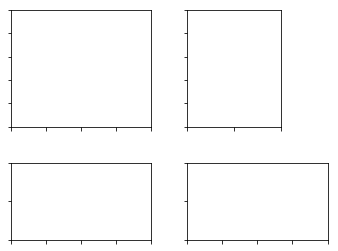

In [11]:
#Simple Axes Divider 2

import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import Divider
import matplotlib.pyplot as plt

fig1 = plt.figure(1, (5.5, 4.))

# the rect parameter will be ignore as we will set axes_locator
rect = (0.1, 0.1, 0.8, 0.8)
ax = [fig1.add_axes(rect, label="%d" % i) for i in range(4)]

horiz = [Size.Scaled(1.5), Size.Fixed(.5), Size.Scaled(1.),
         Size.Scaled(.5)]

vert = [Size.Scaled(1.), Size.Fixed(.5), Size.Scaled(1.5)]

# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig1, rect, horiz, vert, aspect=False)

ax[0].set_axes_locator(divider.new_locator(nx=0, ny=0))
ax[1].set_axes_locator(divider.new_locator(nx=0, ny=2))
ax[2].set_axes_locator(divider.new_locator(nx=2, ny=2))
ax[3].set_axes_locator(divider.new_locator(nx=2, nx1=4, ny=0))

for ax1 in ax:
    ax1.tick_params(labelbottom=False, labelleft=False)

plt.show()

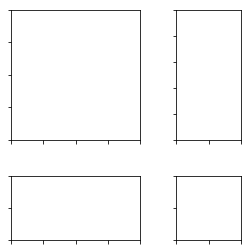

In [12]:
#Simple Axes Divider 3

import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import Divider
import matplotlib.pyplot as plt


fig1 = plt.figure(1, (5.5, 4))

# the rect parameter will be ignore as we will set axes_locator
rect = (0.1, 0.1, 0.8, 0.8)
ax = [fig1.add_axes(rect, label="%d" % i) for i in range(4)]


horiz = [Size.AxesX(ax[0]), Size.Fixed(.5), Size.AxesX(ax[1])]
vert = [Size.AxesY(ax[0]), Size.Fixed(.5), Size.AxesY(ax[2])]

# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig1, rect, horiz, vert, aspect=False)


ax[0].set_axes_locator(divider.new_locator(nx=0, ny=0))
ax[1].set_axes_locator(divider.new_locator(nx=2, ny=0))
ax[2].set_axes_locator(divider.new_locator(nx=0, ny=2))
ax[3].set_axes_locator(divider.new_locator(nx=2, ny=2))

ax[0].set_xlim(0, 2)
ax[1].set_xlim(0, 1)

ax[0].set_ylim(0, 1)
ax[2].set_ylim(0, 2)

divider.set_aspect(1.)

for ax1 in ax:
    ax1.tick_params(labelbottom=False, labelleft=False)

plt.show()

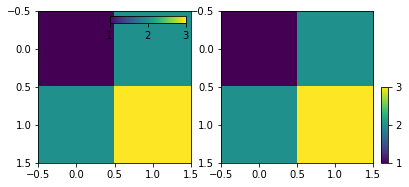

In [13]:
#Demo Colorbar With Inset Locator

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

axins1 = inset_axes(ax1,
                    width="50%",  # width = 10% of parent_bbox width
                    height="5%",  # height : 50%
                    loc=1)

im1 = ax1.imshow([[1, 2], [2, 3]])
plt.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
axins1.xaxis.set_ticks_position("bottom")

axins = inset_axes(ax2,
                   width="5%",  # width = 10% of parent_bbox width
                   height="50%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

# Controlling the placement of the inset axes is basically same as that
# of the legend.  you may want to play with the borderpad value and
# the bbox_to_anchor coordinate.

im = ax2.imshow([[1, 2], [2, 3]])
plt.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.draw()
plt.show()

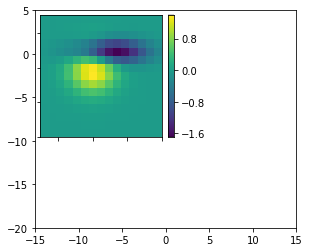

In [14]:
#Demo Colorbar of Inset Axes

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.colorbar import colorbar


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    import numpy as np
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


fig, ax = plt.subplots(figsize=[5, 4])

Z, extent = get_demo_image()

ax.set(aspect=1,
       xlim=(-15, 15),
       ylim=(-20, 5))


axins = zoomed_inset_axes(ax, 2, loc=2)  # zoom = 6
im = axins.imshow(Z, extent=extent, interpolation="nearest",
                  origin="lower")

plt.xticks(visible=False)
plt.yticks(visible=False)


# colorbar
cax = inset_axes(axins,
                 width="5%",  # width = 10% of parent_bbox width
                 height="100%",  # height : 50%
                 loc=3,
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )

colorbar(im, cax=cax)

plt.show()

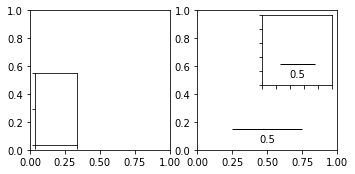

In [15]:
#Inset Locator Demo

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


def add_sizebar(ax, size):
    asb = AnchoredSizeBar(ax.transData,
                          size,
                          str(size),
                          loc=8,
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


fig, (ax, ax2) = plt.subplots(1, 2, figsize=[5.5, 3])

# first subplot
ax.set_aspect(1)

axins = inset_axes(ax,
                   width="30%",  # width = 30% of parent_bbox
                   height=1.,  # height : 1 inch
                   loc=3)

plt.xticks(visible=False)
plt.yticks(visible=False)


# second subplot
ax2.set_aspect(1)

axins = zoomed_inset_axes(ax2, zoom=0.5, loc='upper right')
# fix the number of ticks on the inset axes
axins.yaxis.get_major_locator().set_params(nbins=7)
axins.xaxis.get_major_locator().set_params(nbins=7)

plt.xticks(visible=False)
plt.yticks(visible=False)

add_sizebar(ax2, 0.5)
add_sizebar(axins, 0.5)

plt.draw()
plt.show()

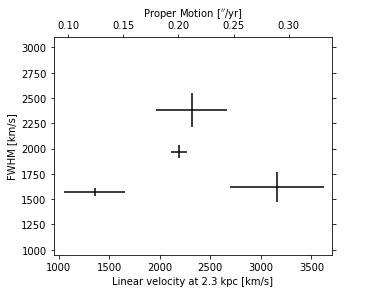

In [16]:
#Parasite Simple2

import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.parasite_axes import SubplotHost

obs = [["01_S1", 3.88, 0.14, 1970, 63],
       ["01_S4", 5.6, 0.82, 1622, 150],
       ["02_S1", 2.4, 0.54, 1570, 40],
       ["03_S1", 4.1, 0.62, 2380, 170]]


fig = plt.figure()

ax_kms = SubplotHost(fig, 1, 1, 1, aspect=1.)

# angular proper motion("/yr) to linear velocity(km/s) at distance=2.3kpc
pm_to_kms = 1./206265.*2300*3.085e18/3.15e7/1.e5

aux_trans = mtransforms.Affine2D().scale(pm_to_kms, 1.)
ax_pm = ax_kms.twin(aux_trans)
ax_pm.set_viewlim_mode("transform")

fig.add_subplot(ax_kms)

for n, ds, dse, w, we in obs:
    time = ((2007 + (10. + 4/30.)/12) - 1988.5)
    v = ds / time * pm_to_kms
    ve = dse / time * pm_to_kms
    ax_kms.errorbar([v], [w], xerr=[ve], yerr=[we], color="k")


ax_kms.axis["bottom"].set_label("Linear velocity at 2.3 kpc [km/s]")
ax_kms.axis["left"].set_label("FWHM [km/s]")
ax_pm.axis["top"].set_label(r"Proper Motion [$''$/yr]")
ax_pm.axis["top"].label.set_visible(True)
ax_pm.axis["right"].major_ticklabels.set_visible(False)

ax_kms.set_xlim(950, 3700)
ax_kms.set_ylim(950, 3100)
# xlim and ylim of ax_pms will be automatically adjusted.

plt.draw()
plt.show()

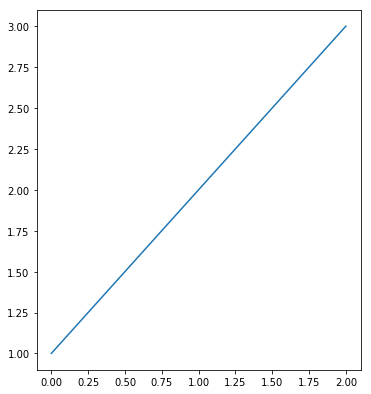

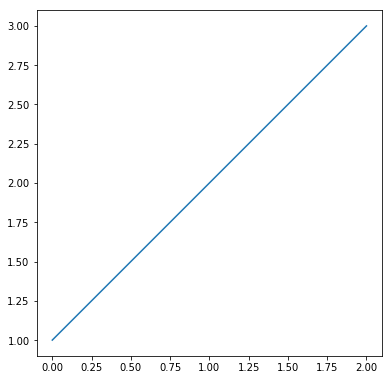

In [17]:
#Demo Fixed Size Axes

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import Divider, LocatableAxes, Size


def demo_fixed_size_axes():
    fig1 = plt.figure(1, (6, 6))

    # The first items are for padding and the second items are for the axes.
    # sizes are in inch.
    h = [Size.Fixed(1.0), Size.Fixed(4.5)]
    v = [Size.Fixed(0.7), Size.Fixed(5.)]

    divider = Divider(fig1, (0.0, 0.0, 1., 1.), h, v, aspect=False)
    # the width and height of the rectangle is ignored.

    ax = LocatableAxes(fig1, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1, ny=1))

    fig1.add_axes(ax)

    ax.plot([1, 2, 3])


def demo_fixed_pad_axes():
    fig = plt.figure(2, (6, 6))

    # The first & third items are for padding and the second items are for the
    # axes. Sizes are in inches.
    h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
    v = [Size.Fixed(0.7), Size.Scaled(1.), Size.Fixed(.5)]

    divider = Divider(fig, (0.0, 0.0, 1., 1.), h, v, aspect=False)
    # the width and height of the rectangle is ignored.

    ax = LocatableAxes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1, ny=1))

    fig.add_axes(ax)

    ax.plot([1, 2, 3])


if __name__ == "__main__":
    demo_fixed_size_axes()
    demo_fixed_pad_axes()

    plt.show()

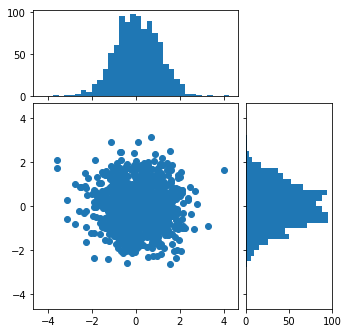

In [18]:
#Scatter Hist

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)


# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

axHistx.set_yticks([0, 50, 100])

axHisty.set_xticks([0, 50, 100])

plt.draw()
plt.show()

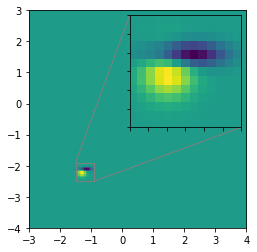

In [19]:
#Inset Locator Demo2

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    import numpy as np
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

fig, ax = plt.subplots(figsize=[5, 4])

# prepare the demo image
Z, extent = get_demo_image()
Z2 = np.zeros([150, 150], dtype="d")
ny, nx = Z.shape
Z2[30:30 + ny, 30:30 + nx] = Z

# extent = [-3, 4, -4, 3]
ax.imshow(Z2, extent=extent, interpolation="nearest",
          origin="lower")

axins = zoomed_inset_axes(ax, 6, loc=1)  # zoom = 6
axins.imshow(Z2, extent=extent, interpolation="nearest",
             origin="lower")

# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
# fix the number of ticks on the inset axes
axins.yaxis.get_major_locator().set_params(nbins=7)
axins.xaxis.get_major_locator().set_params(nbins=7)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

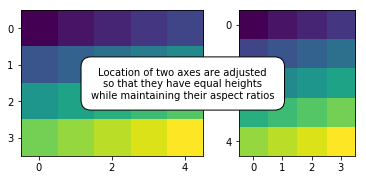

In [20]:
#Demo Axes Hbox Divider

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size


def make_heights_equal(fig, rect, ax1, ax2, pad):
    # pad in inches

    h1, v1 = Size.AxesX(ax1), Size.AxesY(ax1)
    h2, v2 = Size.AxesX(ax2), Size.AxesY(ax2)

    pad_v = Size.Scaled(1)
    pad_h = Size.Fixed(pad)

    my_divider = HBoxDivider(fig, rect,
                             horizontal=[h1, pad_h, h2],
                             vertical=[v1, pad_v, v2])

    ax1.set_axes_locator(my_divider.new_locator(0))
    ax2.set_axes_locator(my_divider.new_locator(2))


if __name__ == "__main__":

    arr1 = np.arange(20).reshape((4, 5))
    arr2 = np.arange(20).reshape((5, 4))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(arr1, interpolation="nearest")
    ax2.imshow(arr2, interpolation="nearest")

    rect = 111  # subplot param for combined axes
    make_heights_equal(fig, rect, ax1, ax2, pad=0.5)  # pad in inches

    for ax in [ax1, ax2]:
        ax.locator_params(nbins=4)

    # annotate
    ax3 = plt.axes([0.5, 0.5, 0.001, 0.001], frameon=False)
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.annotate("Location of two axes are adjusted\n"
                 "so that they have equal heights\n"
                 "while maintaining their aspect ratios", (0.5, 0.5),
                 xycoords="axes fraction", va="center", ha="center",
                 bbox=dict(boxstyle="round, pad=1", fc="w"))

    plt.show()

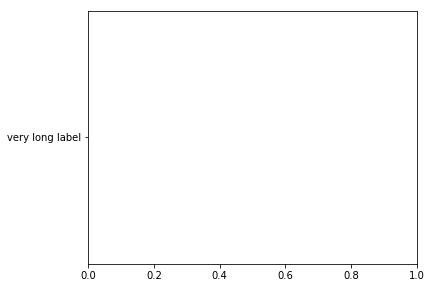

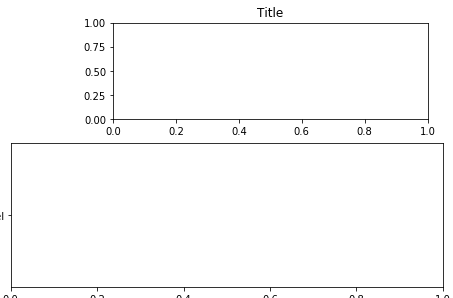

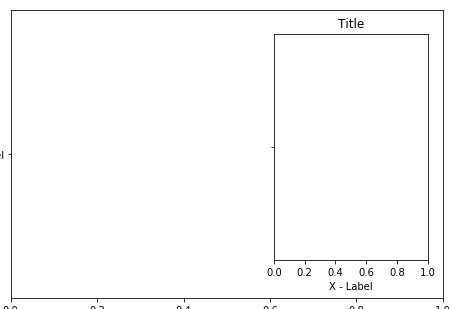

In [21]:
#Make Room For Ylabel Using Axesgrid


from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable


if __name__ == "__main__":

    import matplotlib.pyplot as plt

    def ex1():
        plt.figure(1)
        ax = plt.axes([0, 0, 1, 1])
        #ax = plt.subplot(111)

        ax.set_yticks([0.5])
        ax.set_yticklabels(["very long label"])

        make_axes_area_auto_adjustable(ax)

    def ex2():

        plt.figure(2)
        ax1 = plt.axes([0, 0, 1, 0.5])
        ax2 = plt.axes([0, 0.5, 1, 0.5])

        ax1.set_yticks([0.5])
        ax1.set_yticklabels(["very long label"])
        ax1.set_ylabel("Y label")

        ax2.set_title("Title")

        make_axes_area_auto_adjustable(ax1, pad=0.1, use_axes=[ax1, ax2])
        make_axes_area_auto_adjustable(ax2, pad=0.1, use_axes=[ax1, ax2])

    def ex3():

        fig = plt.figure(3)
        ax1 = plt.axes([0, 0, 1, 1])
        divider = make_axes_locatable(ax1)

        ax2 = divider.new_horizontal("100%", pad=0.3, sharey=ax1)
        ax2.tick_params(labelleft="off")
        fig.add_axes(ax2)

        divider.add_auto_adjustable_area(use_axes=[ax1], pad=0.1,
                                         adjust_dirs=["left"])
        divider.add_auto_adjustable_area(use_axes=[ax2], pad=0.1,
                                         adjust_dirs=["right"])
        divider.add_auto_adjustable_area(use_axes=[ax1, ax2], pad=0.1,
                                         adjust_dirs=["top", "bottom"])

        ax1.set_yticks([0.5])
        ax1.set_yticklabels(["very long label"])

        ax2.set_title("Title")
        ax2.set_xlabel("X - Label")

    ex1()
    ex2()
    ex3()

    plt.show()

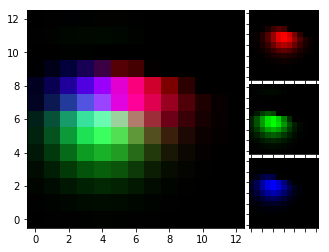

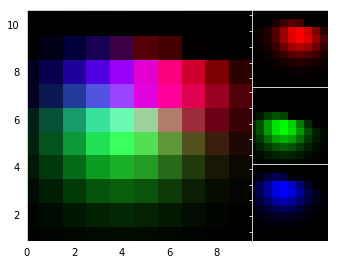

In [22]:
#Demo Axes RGB

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def get_rgb():
    Z, extent = get_demo_image()

    Z[Z < 0] = 0.
    Z = Z/Z.max()

    R = Z[:13, :13]
    G = Z[2:, 2:]
    B = Z[:13, 2:]

    return R, G, B


def make_cube(r, g, b):
    ny, nx = r.shape
    R = np.zeros([ny, nx, 3], dtype="d")
    R[:, :, 0] = r
    G = np.zeros_like(R)
    G[:, :, 1] = g
    B = np.zeros_like(R)
    B[:, :, 2] = b

    RGB = R + G + B

    return R, G, B, RGB


def demo_rgb():
    fig, ax = plt.subplots()
    ax_r, ax_g, ax_b = make_rgb_axes(ax, pad=0.02)
    #fig.add_axes(ax_r)
    #fig.add_axes(ax_g)
    #fig.add_axes(ax_b)

    r, g, b = get_rgb()
    im_r, im_g, im_b, im_rgb = make_cube(r, g, b)
    kwargs = dict(origin="lower", interpolation="nearest")
    ax.imshow(im_rgb, **kwargs)
    ax_r.imshow(im_r, **kwargs)
    ax_g.imshow(im_g, **kwargs)
    ax_b.imshow(im_b, **kwargs)


def demo_rgb2():
    fig = plt.figure(2)
    ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8], pad=0.0)
    #fig.add_axes(ax)
    #ax.add_RGB_to_figure()

    r, g, b = get_rgb()
    kwargs = dict(origin="lower", interpolation="nearest")
    ax.imshow_rgb(r, g, b, **kwargs)

    ax.RGB.set_xlim(0., 9.5)
    ax.RGB.set_ylim(0.9, 10.6)

    for ax1 in [ax.RGB, ax.R, ax.G, ax.B]:
        for sp1 in ax1.spines.values():
            sp1.set_color("w")
        for tick in ax1.xaxis.get_major_ticks() + ax1.yaxis.get_major_ticks():
            tick.tick1line.set_mec("w")
            tick.tick2line.set_mec("w")

    return ax


demo_rgb()
ax = demo_rgb2()

plt.show()

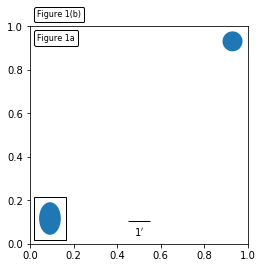

In [24]:
#Simple Anchored Artists

import matplotlib.pyplot as plt


def draw_text(ax):
    from matplotlib.offsetbox import AnchoredText
    at = AnchoredText("Figure 1a",
                      loc=2, prop=dict(size=8), frameon=True,
                      )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    at2 = AnchoredText("Figure 1(b)",
                       loc=3, prop=dict(size=8), frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax.transAxes
                       )
    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at2)


def draw_circle(ax):  # circle in the canvas coordinate
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(20, 20, 0, 0,
                              loc=1, pad=0., frameon=False)
    p = Circle((10, 10), 10)
    ada.da.add_artist(p)
    ax.add_artist(ada)


def draw_ellipse(ax):
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredEllipse
    # draw an ellipse of width=0.1, height=0.15 in the data coordinate
    ae = AnchoredEllipse(ax.transData, width=0.1, height=0.15, angle=0.,
                         loc=3, pad=0.5, borderpad=0.4, frameon=True)

    ax.add_artist(ae)


def draw_sizebar(ax):
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    # draw a horizontal bar with length of 0.1 in Data coordinate
    # (ax.transData) with a label underneath.
    asb = AnchoredSizeBar(ax.transData,
                          0.1,
                          r"1$^{\prime}$",
                          loc=8,
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


if 1:
    ax = plt.gca()
    ax.set_aspect(1.)

    draw_text(ax)
    draw_circle(ax)
    draw_ellipse(ax)
    draw_sizebar(ax)

    plt.show()

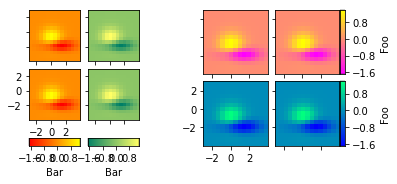

In [26]:
#Demo Edge Colorbar

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_bottom_cbar(fig):
    """
    A grid of 2x2 images with a colorbar for each column.
    """
    grid = AxesGrid(fig, 121,  # similar to subplot(132)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    share_all=True,
                    label_mode="1",
                    cbar_location="bottom",
                    cbar_mode="edge",
                    cbar_pad=0.25,
                    cbar_size="15%",
                    direction="column"
                    )

    Z, extent = get_demo_image()
    cmaps = [plt.get_cmap("autumn"), plt.get_cmap("summer")]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            cmap=cmaps[i//2])
        if i % 2:
            cbar = grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label("Bar")

    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_right_cbar(fig):
    """
    A grid of 2x2 images. Each row has its own colorbar.
    """

    grid = AxesGrid(F, 122,  # similar to subplot(122)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    label_mode="1",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="7%",
                    cbar_pad="2%",
                    )
    Z, extent = get_demo_image()
    cmaps = [plt.get_cmap("spring"), plt.get_cmap("winter")]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label('Foo')

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


if 1:
    F = plt.figure(1, (5.5, 2.5))

    F.subplots_adjust(left=0.05, right=0.93)

    demo_bottom_cbar(F)
    demo_right_cbar(F)

    plt.draw()
    plt.show()

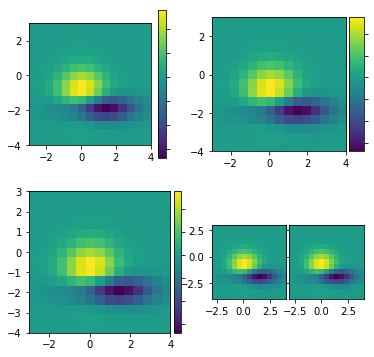

In [27]:
#Demo Axes Divider

import matplotlib.pyplot as plt


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_simple_image(ax):
    Z, extent = get_demo_image()

    im = ax.imshow(Z, extent=extent, interpolation="nearest")
    cb = plt.colorbar(im)
    plt.setp(cb.ax.get_yticklabels(), visible=False)


def demo_locatable_axes_hard(fig1):

    from mpl_toolkits.axes_grid1 \
        import SubplotDivider, LocatableAxes, Size

    divider = SubplotDivider(fig1, 2, 2, 2, aspect=True)

    # axes for image
    ax = LocatableAxes(fig1, divider.get_position())

    # axes for colorbar
    ax_cb = LocatableAxes(fig1, divider.get_position())

    h = [Size.AxesX(ax),  # main axes
         Size.Fixed(0.05),  # padding, 0.1 inch
         Size.Fixed(0.2),  # colorbar, 0.3 inch
         ]

    v = [Size.AxesY(ax)]

    divider.set_horizontal(h)
    divider.set_vertical(v)

    ax.set_axes_locator(divider.new_locator(nx=0, ny=0))
    ax_cb.set_axes_locator(divider.new_locator(nx=2, ny=0))

    fig1.add_axes(ax)
    fig1.add_axes(ax_cb)

    ax_cb.axis["left"].toggle(all=False)
    ax_cb.axis["right"].toggle(ticks=True)

    Z, extent = get_demo_image()

    im = ax.imshow(Z, extent=extent, interpolation="nearest")
    plt.colorbar(im, cax=ax_cb)
    plt.setp(ax_cb.get_yticklabels(), visible=False)


def demo_locatable_axes_easy(ax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)

    ax_cb = divider.new_horizontal(size="5%", pad=0.05)
    fig1 = ax.get_figure()
    fig1.add_axes(ax_cb)

    Z, extent = get_demo_image()
    im = ax.imshow(Z, extent=extent, interpolation="nearest")

    plt.colorbar(im, cax=ax_cb)
    ax_cb.yaxis.tick_right()
    ax_cb.yaxis.set_tick_params(labelright=False)


def demo_images_side_by_side(ax):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)

    Z, extent = get_demo_image()
    ax2 = divider.new_horizontal(size="100%", pad=0.05)
    fig1 = ax.get_figure()
    fig1.add_axes(ax2)

    ax.imshow(Z, extent=extent, interpolation="nearest")
    ax2.imshow(Z, extent=extent, interpolation="nearest")
    ax2.yaxis.set_tick_params(labelleft=False)


def demo():

    fig1 = plt.figure(1, (6, 6))
    fig1.clf()

    # PLOT 1
    # simple image & colorbar
    ax = fig1.add_subplot(2, 2, 1)
    demo_simple_image(ax)

    # PLOT 2
    # image and colorbar whose location is adjusted in the drawing time.
    # a hard way

    demo_locatable_axes_hard(fig1)

    # PLOT 3
    # image and colorbar whose location is adjusted in the drawing time.
    # a easy way

    ax = fig1.add_subplot(2, 2, 3)
    demo_locatable_axes_easy(ax)

    # PLOT 4
    # two images side by side with fixed padding.

    ax = fig1.add_subplot(2, 2, 4)
    demo_images_side_by_side(ax)

    plt.draw()
    plt.show()


demo()

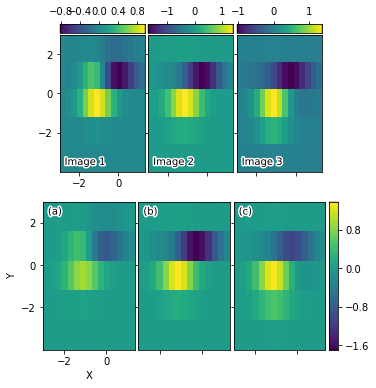

In [28]:
#Demo Axes Grid2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def add_inner_title(ax, title, loc, size=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke
    if size is None:
        size = dict(size=plt.rcParams['legend.fontsize'])
    at = AnchoredText(title, loc=loc, prop=size,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)
    ax.add_artist(at)
    at.txt._text.set_path_effects([withStroke(foreground="w", linewidth=3)])
    return at

if 1:
    F = plt.figure(1, (6, 6))
    F.clf()

    # prepare images
    Z, extent = get_demo_image()
    ZS = [Z[i::3, :] for i in range(3)]
    extent = extent[0], extent[1]/3., extent[2], extent[3]

    # demo 1 : colorbar at each axes

    grid = ImageGrid(F, 211,  # similar to subplot(111)
                     nrows_ncols=(1, 3),
                     direction="row",
                     axes_pad=0.05,
                     add_all=True,
                     label_mode="1",
                     share_all=True,
                     cbar_location="top",
                     cbar_mode="each",
                     cbar_size="7%",
                     cbar_pad="1%",
                     )

    for ax, z in zip(grid, ZS):
        im = ax.imshow(
            z, origin="lower", extent=extent, interpolation="nearest")
        ax.cax.colorbar(im)

    for ax, im_title in zip(grid, ["Image 1", "Image 2", "Image 3"]):
        t = add_inner_title(ax, im_title, loc=3)
        t.patch.set_alpha(0.5)

    for ax, z in zip(grid, ZS):
        ax.cax.toggle_label(True)
        #axis = ax.cax.axis[ax.cax.orientation]
        #axis.label.set_text("counts s$^{-1}$")
        #axis.label.set_size(10)
        #axis.major_ticklabels.set_size(6)

    # changing the colorbar ticks
    grid[1].cax.set_xticks([-1, 0, 1])
    grid[2].cax.set_xticks([-1, 0, 1])

    grid[0].set_xticks([-2, 0])
    grid[0].set_yticks([-2, 0, 2])

    # demo 2 : shared colorbar

    grid2 = ImageGrid(F, 212,
                      nrows_ncols=(1, 3),
                      direction="row",
                      axes_pad=0.05,
                      add_all=True,
                      label_mode="1",
                      share_all=True,
                      cbar_location="right",
                      cbar_mode="single",
                      cbar_size="10%",
                      cbar_pad=0.05,
                      )

    grid2[0].set_xlabel("X")
    grid2[0].set_ylabel("Y")

    vmax, vmin = np.max(ZS), np.min(ZS)
    import matplotlib.colors
    norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)

    for ax, z in zip(grid2, ZS):
        im = ax.imshow(z, norm=norm,
                       origin="lower", extent=extent,
                       interpolation="nearest")

    # With cbar_mode="single", cax attribute of all axes are identical.
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)

    for ax, im_title in zip(grid2, ["(a)", "(b)", "(c)"]):
        t = add_inner_title(ax, im_title, loc=2)
        t.patch.set_ec("none")
        t.patch.set_alpha(0.5)

    grid2[0].set_xticks([-2, 0])
    grid2[0].set_yticks([-2, 0, 2])

    plt.draw()
    plt.show()

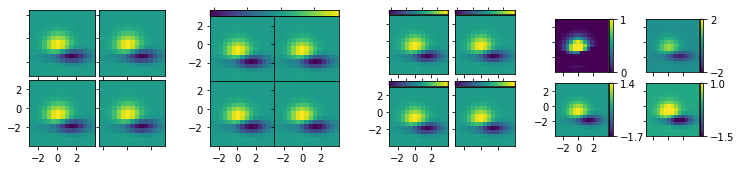

In [30]:
#Demo Axes Grid

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_simple_grid(fig):
    """
    A grid of 2x2 images with 0.05 inch pad between images and only
    the lower-left axes is labeled.
    """
    grid = ImageGrid(fig, 141,  # similar to subplot(141)
                     nrows_ncols=(2, 2),
                     axes_pad=0.05,
                     label_mode="1",
                     )

    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")

    # This only affects axes in first column and second row as share_all =
    # False.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_single_cbar(fig):
    """
    A grid of 2x2 images with a single colorbar
    """
    grid = ImageGrid(fig, 142,  # similar to subplot(142)
                     nrows_ncols=(2, 2),
                     axes_pad=0.0,
                     share_all=True,
                     label_mode="L",
                     cbar_location="top",
                     cbar_mode="single",
                     )

    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")
    grid.cbar_axes[0].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(False)

    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_each_cbar(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """

    grid = ImageGrid(fig, 143,  # similar to subplot(143)
                     nrows_ncols=(2, 2),
                     axes_pad=0.1,
                     label_mode="1",
                     share_all=True,
                     cbar_location="top",
                     cbar_mode="each",
                     cbar_size="7%",
                     cbar_pad="2%",
                     )
    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")
        grid.cbar_axes[i].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(False)

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_each_cbar_labelled(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """

    grid = ImageGrid(fig, 144,  # similar to subplot(144)
                     nrows_ncols=(2, 2),
                     axes_pad=(0.45, 0.15),
                     label_mode="1",
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="each",
                     cbar_size="7%",
                     cbar_pad="2%",
                     )
    Z, extent = get_demo_image()

    # Use a different colorbar range every time
    limits = ((0, 1), (-2, 2), (-1.7, 1.4), (-1.5, 1))
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            vmin=limits[i][0], vmax=limits[i][1])
        grid.cbar_axes[i].colorbar(im)

    for i, cax in enumerate(grid.cbar_axes):
        cax.set_yticks((limits[i][0], limits[i][1]))

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


if 1:
    F = plt.figure(1, (10.5, 2.5))

    F.subplots_adjust(left=0.05, right=0.95)

    demo_simple_grid(F)
    demo_grid_with_single_cbar(F)
    demo_grid_with_each_cbar(F)
    demo_grid_with_each_cbar_labelled(F)

    plt.draw()
    plt.show()